In [96]:
#pip install folium

In [2]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import seaborn as sb

In [3]:
df=pd.read_excel('/Users/saisudhasuryanarayanan/Desktop/bostoncrimenewdata.xlsx')

In [4]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,Date,...,Lat,Long,Location,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night,Transport _1,Transport _2,Transport _3,Transport _4
0,TESTTEST2,423,ASSAULT - AGGRAVATED,ASSAULT - AGGRAVATED,External,Lexington,,0,2019-10-16 00:00:00,2019-10-16,...,NaN,NaN,"(0.00000000, 0.00000000)",45158,5.5,60,Car,Public Bus,Subway,Walk
1,I92102201,3301,VERBAL DISPUTE,VERBAL DISPUTE,E13,Jamaica Plain,583,0,2019-12-20 03:08:00,2019-12-20,...,42.325122,-71.107779,"(42.32512200, -71.10777900)",94556,7.0,66,Walk,Public Bus,Subway,Car
2,I92097173,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,C11,Dorchester,355,0,2019-10-23 00:00:00,2019-10-23,...,42.297555,-71.059709,"(42.29755500, -71.05970900)",45158,5.5,60,Car,Public Bus,Subway,Walk
3,I92094519,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,Brighton,765,0,2019-11-22 07:50:00,2019-11-22,...,42.355120,-71.162678,"(42.35512000, -71.16267800)",35116,6.1,37,Walk,Public Bus,Subway,Car
4,I92089785,3005,SICK ASSIST,SICK ASSIST,E13,Jamaica Plain,574,0,2019-11-05 18:00:00,2019-11-05,...,42.309718,-71.104294,"(42.30971800, -71.10429400)",45158,5.5,60,Walk,Public Bus,Subway,Car


In [5]:
dff=pd.DataFrame(df,columns=['Average_rent_per_night','Unemployment_Rate_in_District'])

print(dff)


        Average_rent_per_night  Unemployment_Rate_in_District
0                           60                            5.5
1                           66                            7.0
2                           60                            5.5
3                           37                            6.1
4                           60                            5.5
5                           66                            7.0
6                           60                            5.5
7                           60                            5.5
8                           37                            6.1
9                           37                            6.1
10                          53                            2.8
11                          72                            5.5
12                          66                            7.0
13                          61                            4.0
14                          72                            5.5
15      

In [7]:
m=plot.scatter(df['Average_rent_per_night'],df['Unemployment_Rate_in_District'])
print(m)

NameError: name 'plot' is not defined

In [8]:
#Statistical Details
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night
count,477612.000000,477612.000000,477612.000000,477612.000000,449404.000000,449404.000000,477612.000000,477612.000000,477612.000000
mean,2332.732050,2017.349537,6.628868,13.093991,42.232518,-70.938406,57734.539919,5.673234,58.980373
std,1182.247929,1.433603,3.423139,6.324785,1.966808,3.181605,27521.096445,1.260159,10.929280
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.244055,17208.000000,2.800000,37.000000
25%,1102.000000,2016.000000,4.000000,9.000000,42.297027,-71.097398,38206.000000,5.500000,60.000000
50%,3005.000000,2017.000000,7.000000,14.000000,42.325475,-71.077706,43436.000000,6.100000,61.000000
75%,3201.000000,2019.000000,10.000000,18.000000,42.348406,-71.062563,94556.000000,7.000000,66.000000
max,3831.000000,2020.000000,12.000000,23.000000,42.449840,0.000000,94556.000000,7.000000,72.000000


In [9]:
#concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477612 entries, 0 to 477611
Data columns (total 27 columns):
INCIDENT_NUMBER                        477612 non-null object
OFFENSE_CODE                           477612 non-null int64
OFFENSE_CODE_GROUP                     477612 non-null object
OFFENSE_DESCRIPTION                    477612 non-null object
DISTRICT                               477612 non-null object
DISTRICT_NAME                          477612 non-null object
REPORTING_AREA                         477612 non-null object
SHOOTING                               52519 non-null object
OCCURRED_ON_DATE                       477612 non-null datetime64[ns]
Date                                   477612 non-null datetime64[ns]
Time                                   477612 non-null object
YEAR                                   477612 non-null int64
MONTH                                  477612 non-null int64
DAY_OF_WEEK                            477612 non-null object
HOUR     

In [10]:
#Mapping districts with locations
districts=df.groupby('DISTRICT_NAME').first()
print(districts.to_string(columns=['Location', 'DISTRICT']))
#print(districts)

                                  Location  DISTRICT
DISTRICT_NAME                                       
Brighton       (42.35512000, -71.16267800)       D14
Charlestown    (42.37380000, -71.06290300)       A15
Dorchester     (42.29755500, -71.05970900)       C11
Downtown       (42.36769032, -71.06586347)        A1
East Boston    (42.37100500, -71.03897600)        A7
Hyde Park      (42.27161600, -71.11807400)       E18
Jamaica Plain  (42.32512200, -71.10777900)       E13
Lexington         (0.00000000, 0.00000000)  External
Mattapan       (42.27796370, -71.09246318)        B3
Roxbury        (42.30433900, -71.08477800)        B2
South Boston   (42.35275600, -71.04748100)        C6
South End      (42.34947586, -71.07640150)        D4
West Roxbury   (42.28709300, -71.14822100)        E5


In [11]:
# co-ordinates of Boston
boston_coordinates=(42.3601,-71.0589)

In [12]:
map = folium.Map(location=boston_coordinates, zoom_start=11)

In [13]:
#co-ordinates of all the districts
Brighton=(42.3464, -71.1627)        
Charlestown=(42.3782, -71.0602)          
Dorchester=(42.3016, -71.0676)           
Downtown=(42.3557, -71.0572)               
East_Boston=(42.3702, -71.0389)           
Hyde_Park=(42.2565, -71.1241)           
Jamaica_Plain=(42.3097, -71.1151)                
Lexington_external=(42.4473, -71.2245)  
Mattapan=(42.2771, -71.0914)              
Roxbury=(42.3152, -71.0914)                  
South_Boston=(42.3381, -71.0476)           
South_End=(42.3388, -71.0765)                
West_Roxbury=(42.2798, -71.1627)        

In [14]:
#Markers to display each district
folium.Marker(Brighton, popup = 'Brighton').add_to(map)
folium.Marker(Charlestown, popup = 'Charlestown').add_to(map)
folium.Marker(Dorchester, popup = 'Dorchester').add_to(map)
folium.Marker(Downtown, popup = 'Downtown').add_to(map)
folium.Marker(East_Boston, popup = 'East Boston').add_to(map)
folium.Marker(Hyde_Park, popup = 'Hyde Park').add_to(map)
folium.Marker(Jamaica_Plain, popup = 'Jamaica Plain').add_to(map)
folium.Marker(Lexington_external, popup = 'Lexington').add_to(map)
folium.Marker(Mattapan, popup = 'Mattapan').add_to(map)
folium.Marker(Roxbury, popup = 'Roxbury').add_to(map)
folium.Marker(South_Boston, popup = 'South Boston').add_to(map)
folium.Marker(South_End, popup = 'South End').add_to(map)
folium.Marker(West_Roxbury, popup = 'West Roxbury').add_to(map)

In [15]:
#displaying districts in boston 
display(map)

In [16]:
#plotting all the districts with unemployment rate
unempmap = folium.Map(location=boston_coordinates, zoom_start=11)


In [17]:
folium.Marker(Brighton, popup = 'Brighton-unemployment rate 6.1',icon=folium.Icon(color='orange',icon='glyphicon glyphicon-resize-vertical')).add_to(unempmap)
folium.Marker(Charlestown, popup = 'Charlestown',icon=folium.Icon(color='orange',icon='glyphicon glyphicon-resize-vertical')).add_to(unempmap)
folium.Marker(Dorchester, popup = 'Dorchester',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(Downtown, popup = 'Downtown',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(East_Boston, popup = 'East Boston',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(Hyde_Park, popup = 'Hyde Park-unemployment rate 7.0',icon=folium.Icon(color='darkred',icon='glyphicon glyphicon-arrow-up')).add_to(unempmap)
folium.Marker(Jamaica_Plain, popup = 'Jamaica Plain',icon=folium.Icon(color='darkred',icon='glyphicon glyphicon-arrow-up')).add_to(unempmap)
folium.Marker(Lexington_external, popup = 'Lexington-unemployment rate 5.5',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(Mattapan, popup = 'Mattapan',icon=folium.Icon(color='orange',icon='glyphicon glyphicon-resize-vertical')).add_to(unempmap)
folium.Marker(Roxbury, popup = 'Roxbury',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(South_Boston, popup = 'South Boston',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(South_End, popup = 'South End',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
folium.Marker(West_Roxbury, popup = 'West Roxbury',icon=folium.Icon(color='darkpurple',icon='glyphicon glyphicon-arrow-down')).add_to(unempmap)
display(unempmap)

In [20]:
print(districts.to_string(columns=['Population_in_District_Demographics','Average_rent_per_night']))

               Population_in_District_Demographics  Average_rent_per_night
DISTRICT_NAME                                                             
Brighton                                     35116                      37
Charlestown                                  35116                      37
Dorchester                                   45158                      60
Downtown                                     45158                      60
East Boston                                  43436                      72
Hyde Park                                    94556                      66
Jamaica Plain                                94556                      66
Lexington                                    45158                      60
Mattapan                                     35116                      37
Roxbury                                      43436                      72
South Boston                                 45158                      60
South End                

In [16]:
#districts with high crime
count_districts=print(df['DISTRICT_NAME'].value_counts())

Roxbury          76271
Dorchester       64494
South End        61249
Mattapan         54598
Downtown         53002
South Boston     34547
Brighton         30283
Hyde Park        26744
Jamaica Plain    26514
West Roxbury     20412
East Boston      19422
Charlestown       9974
Lexington          102
Name: DISTRICT_NAME, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


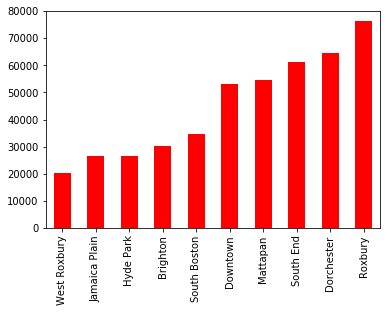

In [17]:
#plotting all districts
plot=df.DISTRICT_NAME.value_counts().iloc[:10].sort_values().plot(kind= 'bar',color='red')

print(plot)

In [18]:
#plotting the 5 high crime districts using map
crimemap = folium.Map(location=boston_coordinates, zoom_start=11)
folium.Marker(Dorchester, popup = 'Dorchester',icon=folium.Icon(color='red',icon='glyphicon glyphicon-flash')).add_to(crimemap)
folium.Marker(Downtown, popup = 'Downtown',icon=folium.Icon(color='red',icon='glyphicon glyphicon-flash')).add_to(crimemap)
folium.Marker(Mattapan, popup = 'Mattapan',icon=folium.Icon(color='red',icon='glyphicon glyphicon-flash')).add_to(crimemap)
folium.Marker(Roxbury, popup = 'Roxbury',icon=folium.Icon(color='red',icon='glyphicon glyphicon-flash')).add_to(crimemap)
folium.Marker(South_End, popup = 'South End',icon=folium.Icon(color='red',icon='glyphicon glyphicon-flash')).add_to(crimemap)
display(crimemap)

In [19]:
#Mapping districts with crime count in each year
#count_districts=print(df['OFFENSE_CODE_GROUP'].value_counts())
crimecount=df.groupby(["YEAR","DISTRICT_NAME"])["OFFENSE_CODE_GROUP"].count()
print(crimecount)
#print(crimecount.to_string(columns=['DISTRICT_NAME']))

YEAR  DISTRICT_NAME
2015  Brighton          3291
      Charlestown       1038
      Dorchester        7366
      Downtown          6032
      East Boston       2429
      Hyde Park         2756
      Jamaica Plain     2827
      Mattapan          5659
      Roxbury           8756
      South Boston      3945
      South End         7304
      West Roxbury      2194
2016  Brighton          6318
      Charlestown       2011
      Dorchester       13823
      Downtown         10878
      East Boston       4096
      Hyde Park         5270
      Jamaica Plain     5657
      Mattapan         11243
      Roxbury          15845
      South Boston      6954
      South End        13073
      West Roxbury      4262
2017  Brighton          6541
      Charlestown       2197
      Dorchester       13893
      Downtown         11358
      East Boston       4119
      Hyde Park         5737
                       ...  
2018  Roxbury          15658
      South Boston      7554
      South End        

In [20]:
#count of missing values in each column
df.isnull().sum()

INCIDENT_NUMBER                             0
OFFENSE_CODE                                0
OFFENSE_CODE_GROUP                          0
OFFENSE_DESCRIPTION                         0
DISTRICT                                    0
DISTRICT_NAME                               0
REPORTING_AREA                              0
SHOOTING                               425093
OCCURRED_ON_DATE                            0
Date                                        0
Time                                        0
YEAR                                        0
MONTH                                       0
DAY_OF_WEEK                                 0
HOUR                                        0
UCR_PART                                50883
STREET                                  16929
Lat                                     28208
Long                                    28208
Location                                    0
Population_in_District_Demographics         0
Unemployment_Rate_in_District     

In [21]:
#Dropping the columns with missing values
missing_cols = ['SHOOTING','YEAR','UCR_PART','STREET','Lat','Long']

df = df.drop(missing_cols, axis=1)

df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,OCCURRED_ON_DATE,Date,Time,...,DAY_OF_WEEK,HOUR,Location,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night,Transport _1,Transport _2,Transport _3,Transport _4
0,TESTTEST2,423,ASSAULT - AGGRAVATED,ASSAULT - AGGRAVATED,External,Lexington,,2019-10-16 00:00:00,2019-10-16,00:00:00,...,Wednesday,0,"(0.00000000, 0.00000000)",45158,5.5,60,Car,Public Bus,Subway,Walk
1,I92102201,3301,VERBAL DISPUTE,VERBAL DISPUTE,E13,Jamaica Plain,583,2019-12-20 03:08:00,2019-12-20,03:08:00,...,Friday,3,"(42.32512200, -71.10777900)",94556,7.0,66,Walk,Public Bus,Subway,Car
2,I92097173,3115,INVESTIGATE PERSON,INVESTIGATE PERSON,C11,Dorchester,355,2019-10-23 00:00:00,2019-10-23,00:00:00,...,Wednesday,0,"(42.29755500, -71.05970900)",45158,5.5,60,Car,Public Bus,Subway,Walk
3,I92094519,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,Brighton,765,2019-11-22 07:50:00,2019-11-22,07:50:00,...,Friday,7,"(42.35512000, -71.16267800)",35116,6.1,37,Walk,Public Bus,Subway,Car
4,I92089785,3005,SICK ASSIST,SICK ASSIST,E13,Jamaica Plain,574,2019-11-05 18:00:00,2019-11-05,18:00:00,...,Tuesday,18,"(42.30971800, -71.10429400)",45158,5.5,60,Walk,Public Bus,Subway,Car


In [22]:
df.isnull().sum()

INCIDENT_NUMBER                        0
OFFENSE_CODE                           0
OFFENSE_CODE_GROUP                     0
OFFENSE_DESCRIPTION                    0
DISTRICT                               0
DISTRICT_NAME                          0
REPORTING_AREA                         0
OCCURRED_ON_DATE                       0
Date                                   0
Time                                   0
MONTH                                  0
DAY_OF_WEEK                            0
HOUR                                   0
Location                               0
Population_in_District_Demographics    0
Unemployment_Rate_in_District          0
Average_rent_per_night                 0
Transport _1                           0
Transport _2                           0
Transport _3                           0
Transport _4                           0
dtype: int64

In [23]:
df.describe()

,OFFENSE_CODE,MONTH,HOUR,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night
count,477612.000000,477612.000000,477612.000000,477612.000000,477612.000000,477612.000000
mean,2332.732050,6.628868,13.093991,57734.539919,5.673234,58.980373
std,1182.247929,3.423139,6.324785,27521.096445,1.260159,10.929280
min,111.000000,1.000000,0.000000,17208.000000,2.800000,37.000000
25%,1102.000000,4.000000,9.000000,38206.000000,5.500000,60.000000
50%,3005.000000,7.000000,14.000000,43436.000000,6.100000,61.000000
75%,3201.000000,10.000000,18.000000,94556.000000,7.000000,66.000000
max,3831.000000,12.000000,23.000000,94556.000000,7.000000,72.000000


In [24]:
corr=df.corr()

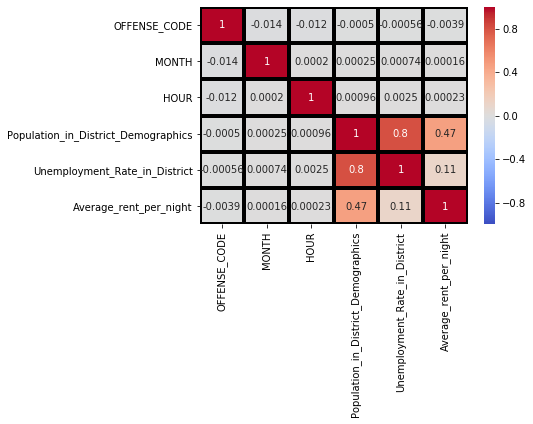

In [25]:
map1=sb.heatmap(corr,annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

AxesSubplot(0.125,0.125;0.775x0.755)


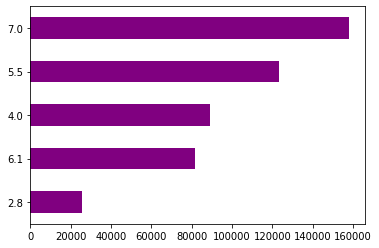

In [26]:
#plotting the overall Unemployment Rate 
plot=df.Unemployment_Rate_in_District.value_counts().iloc[:10].sort_values().plot(kind= 'barh',color='Purple')

print(plot)

In [27]:
#Comparing the mode of Transports with Unemployment rate
districts=df.groupby('DISTRICT_NAME').first()
print(districts.to_string(columns=['Unemployment_Rate_in_District', 'Transport _1','Transport _4']))
#print(districts)

               Unemployment_Rate_in_District Transport _1 Transport _4
DISTRICT_NAME                                                         
Brighton                                 6.1         Walk          Car
Charlestown                              6.1         Walk          Car
Dorchester                               5.5          Car         Walk
Downtown                                 5.5          Car         Walk
East Boston                              5.5          Car         Walk
Hyde Park                                7.0         Walk          Car
Jamaica Plain                            7.0         Walk          Car
Lexington                                5.5          Car         Walk
Mattapan                                 6.1         Walk          Car
Roxbury                                  5.5          Car         Walk
South Boston                             5.5          Car         Walk
South End                                5.5          Car         Walk
West R

In [28]:
#Comparing District's unemployment rate with Average rent
districts=df.groupby('DISTRICT_NAME').first()
print(districts.to_string(columns=['Unemployment_Rate_in_District', 'Average_rent_per_night']))

               Unemployment_Rate_in_District  Average_rent_per_night
DISTRICT_NAME                                                       
Brighton                                 6.1                      37
Charlestown                              6.1                      37
Dorchester                               5.5                      60
Downtown                                 5.5                      60
East Boston                              5.5                      72
Hyde Park                                7.0                      66
Jamaica Plain                            7.0                      66
Lexington                                5.5                      60
Mattapan                                 6.1                      37
Roxbury                                  5.5                      72
South Boston                             5.5                      60
South End                                5.5                      60
West Roxbury                      

In [29]:
#Creating dataframe for Jamaica Plain
Jam=df[df.DISTRICT_NAME.str.contains("Jamaica Plain")]

In [30]:
Jam.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,OCCURRED_ON_DATE,Date,Time,...,DAY_OF_WEEK,HOUR,Location,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night,Transport _1,Transport _2,Transport _3,Transport _4
1,I92102201,3301,VERBAL DISPUTE,VERBAL DISPUTE,E13,Jamaica Plain,583,2019-12-20 03:08:00,2019-12-20,03:08:00,...,Friday,3,"(42.32512200, -71.10777900)",94556,7.0,66,Walk,Public Bus,Subway,Car
4,I92089785,3005,SICK ASSIST,SICK ASSIST,E13,Jamaica Plain,574,2019-11-05 18:00:00,2019-11-05,18:00:00,...,Tuesday,18,"(42.30971800, -71.10429400)",45158,5.5,60,Walk,Public Bus,Subway,Car
12,I20204246,1402,VANDALISM,VANDALISM,E13,Jamaica Plain,646,2020-01-16 16:30:00,2020-01-16,16:30:00,...,Thursday,16,"(42.30976400, -71.11541200)",94556,7.0,66,Walk,Public Bus,Subway,Car
17,I20200718,3201,PROPERTY - LOST/ MISSING,PROPERTY - LOST/ MISSING,E13,Jamaica Plain,574,2020-01-25 12:00:00,2020-01-25,12:00:00,...,Saturday,12,"(42.30971800, -71.10429400)",35116,6.1,37,Walk,Public Bus,Subway,Car
20,I19210875,3301,VERBAL DISPUTE,VERBAL DISPUTE,E13,Jamaica Plain,912,2019-12-30 22:04:00,2019-12-30,22:04:00,...,Monday,22,"(42.32469400, -71.10087900)",43436,5.5,72,Walk,Public Bus,Subway,Car


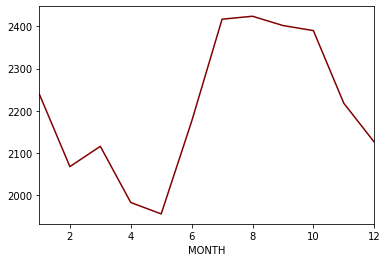

In [31]:
#plotting the trend of Jamaica Plain using Months
Jam.groupby("MONTH").size().plot(kind="line",color="maroon")

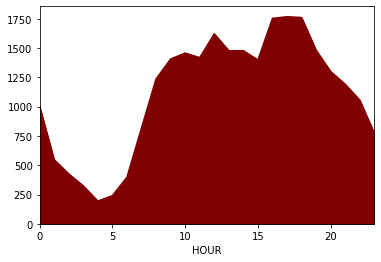

In [32]:
#plotting the trend of Jamaica Plain on Hour basis
Jam.groupby("HOUR").size().plot(kind="area",color="maroon")

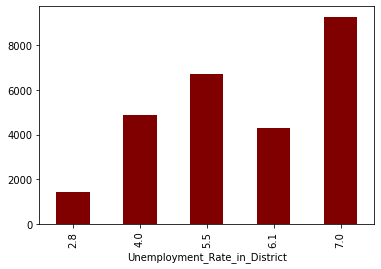

In [33]:
#grouping Jamaica Plain with crimes based on unemploement rate
Jam.groupby("Unemployment_Rate_in_District").size().plot(kind="bar",color="maroon")

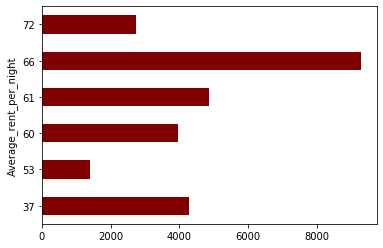

In [34]:
#grouping Jamaica Plain with crimes based on Average rent per night
Jam.groupby("Average_rent_per_night").size().plot(kind="barh",color="maroon")

In [35]:
# Creating a dataframe for East Boston 
east=df[df.DISTRICT_NAME.str.contains("East Boston")]
east.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,OCCURRED_ON_DATE,Date,Time,...,DAY_OF_WEEK,HOUR,Location,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night,Transport _1,Transport _2,Transport _3,Transport _4
19,I20000994,3005,SICK ASSIST,SICK ASSIST,A7,East Boston,28,2020-01-04 17:50:00,2020-01-04,17:50:00,...,Saturday,17,"(42.37100500, -71.03897600)",43436,5.5,72,Car,Public Bus,Subway,Walk
34,I192078640,3115,Investigate Person,INVESTIGATE PERSON,A7,East Boston,28,2019-09-29 01:30:00,2019-09-29,01:30:00,...,Sunday,1,"(42.37339168, -71.03647779)",43436,5.5,72,Car,Public Bus,Subway,Walk
48,I192078615,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,A7,East Boston,25,2019-09-29 02:25:00,2019-09-29,02:25:00,...,Sunday,2,"(42.38258915, -71.03341969)",94556,6.1,53,Car,Public Bus,Subway,Walk
49,I192078613,423,Aggravated Assault,ASSAULT - AGGRAVATED,A7,East Boston,17,2019-09-29 02:30:00,2019-09-29,02:30:00,...,Sunday,2,"(42.37912370, -71.02808210)",94556,6.1,53,Car,Public Bus,Subway,Walk
50,I192078613,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A7,East Boston,17,2019-09-29 02:30:00,2019-09-29,02:30:00,...,Sunday,2,"(42.37912370, -71.02808210)",38206,4.0,61,Car,Public Bus,Subway,Walk


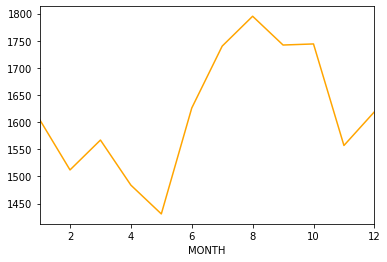

In [36]:
#plotting the trend of  East Boston using Months
east.groupby("MONTH").size().plot(kind="line",color="orange")

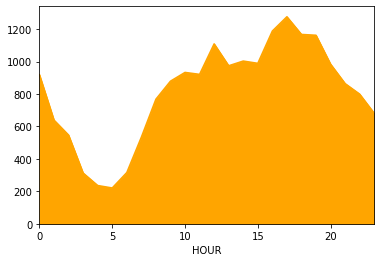

In [37]:
#plotting the trend of  East Boston on Hour basis
east.groupby("HOUR").size().plot(kind="area",color="orange")

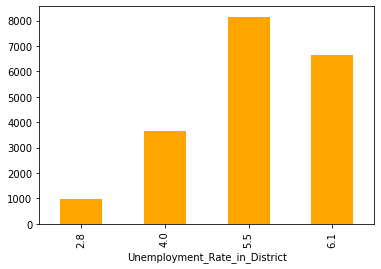

In [38]:
#grouping  East Boston with crimes based on unemployment rate
east.groupby("Unemployment_Rate_in_District").size().plot(kind="bar",color="orange")

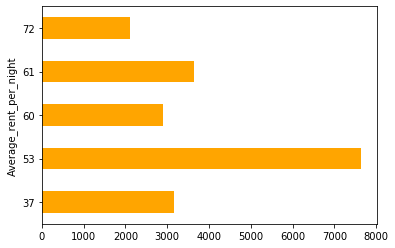

In [39]:
#grouping  East Boston with crimes based on Average rent 
east.groupby("Average_rent_per_night").size().plot(kind="barh",color="orange")

In [563]:
#dataframe for Charlestown
char=df[df.DISTRICT_NAME.str.contains("Charlestown")]
char.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,DISTRICT_NAME,REPORTING_AREA,OCCURRED_ON_DATE,Date,Time,...,DAY_OF_WEEK,HOUR,Location,Population_in_District_Demographics,Unemployment_Rate_in_District,Average_rent_per_night,Transport _1,Transport _2,Transport _3,Transport _4
8,I20207994,3207,PROPERTY - FOUND,PROPERTY - FOUND,A15,Charlestown,60,2020-04-19 13:30:00,2020-04-19,13:30:00,...,Sunday,13,"(42.37380000, -71.06290300)",35116,6.1,37,Walk,Public Bus,Subway,Car
13,I20203469,3410,TOWED MOTOR VEHICLE,TOWED MOTOR VEHICLE,A15,Charlestown,41,2020-03-28 00:00:00,2020-03-28,00:00:00,...,Saturday,0,"(42.37596200, -71.05747200)",38206,4.0,61,Walk,Public Bus,Subway,Car
28,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,Charlestown,47,2019-10-02 08:08:00,2019-10-02,08:08:00,...,Wednesday,8,"(42.38184582, -71.06655134)",35116,6.1,37,Walk,Public Bus,Subway,Car
208,I192078436,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A15,Charlestown,53,2019-09-26 23:00:00,2019-09-26,23:00:00,...,Thursday,23,"(42.38120826, -71.06914345)",38206,4.0,61,Walk,Public Bus,Subway,Car
251,I192078381,619,Larceny,LARCENY ALL OTHERS,A15,Charlestown,40,2019-09-28 10:54:00,2019-09-28,10:54:00,...,Saturday,10,"(42.37439512, -71.05803760)",45158,5.5,37,Walk,Public Bus,Subway,Car


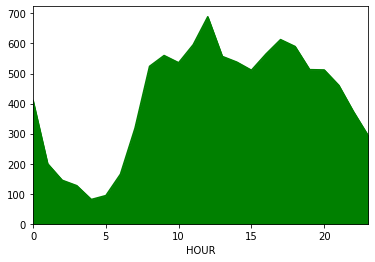

In [564]:
#plotting the trend of Charlestown using Hour
char.groupby("HOUR").size().plot(kind="area",color="green")

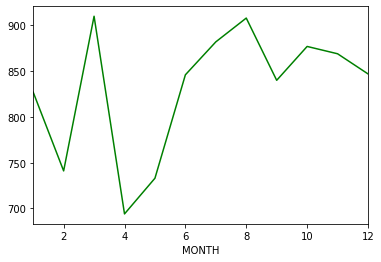

In [565]:
#plotting the trend of Charlestown using Months
char.groupby("MONTH").size().plot(kind="line",color="green")

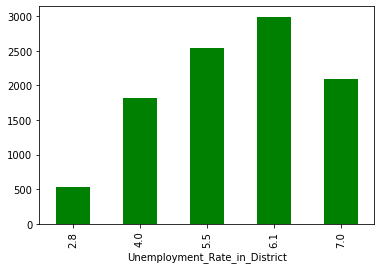

In [566]:
#plotting the trend of Charlestown using Unemployment rate
char.groupby("Unemployment_Rate_in_District").size().plot(kind="bar",color="green")

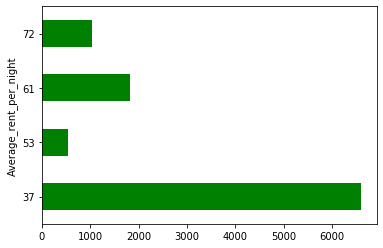

In [567]:
#plotting the trend of Charlestown using Average rent
char.groupby("Average_rent_per_night").size().plot(kind="barh",color="green")

In [1]:
plot=df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values().plot(kind= 'bar',color='red')

print(plot)

NameError: name 'df' is not defined